# 0. Definición del problema

Usted ha sido contratado como parte de un equipo de análisis del rendimiento de estudiantes en la facultad de ingeniería y de ciencias de la universidad de Wisconsin, para participar en el proyecto HESPE (Higher Education Student Performance Evaluation).
Se recolectaron 145 instancias para este estudio, que fue llevado a cabo durante 2019. Cada instancia corresponde a lo contestado por un estudiante en una encuesta.
A continuación, se describe el set de datos:
1. student_id
2. age - Student Age (1: 18-21, 2: 22-25, 3: above 26)
3. sex - Sex (1: female, 2: male)
4. graduated_h_school_type - Graduated high-school type: (1: private, 2: state, 3: other)
5. scholarship_type - Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
6. additional_work - Additional work: (1: Yes, 2: No)
7. activity -Regular artistic or sports activity: (1: Yes, 2: No)
8. partner - Do you have a partner: (1: Yes, 2: No)
9. total_salary - Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
10. transport - Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
11. accomodation - Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
12. mother_ed - Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
13. farther_ed - Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
14. siblings - Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
15. parental_status - Parental status: (1: married, 2: divorced, 3: died - one of them or both)
16. mother_occup - Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
17. father_occup - Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
18. weekly_study_hours - Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
19. reading_non_scientific - Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
20. reading_scientific - Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
21. attendance_seminars_dep -Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
22. impact_of_projects - Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
23. attendances_classes - Attendance to classes (1: always, 2: sometimes, 3: never)
24. preparation_midterm_company - Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
25. preparation_midterm_time - Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
26. taking_notes - Taking notes in classes: (1: never, 2: sometimes, 3: always)
27. listenning - Listening in classes: (1: never, 2: sometimes, 3: always)
28. discussion_improves_interest - Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
29. flip_classrom - Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
30. grade_previous - Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
31. grade_expected - Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
32. course_id

33. grade - OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

Dado el éxito de los modelos predictivos estudiados anteriormente, se tomó la decisión de extender el estudio de forma masiva invitando a participar a todas las instituciones académicas del país y del continente. Sin embargo, también se está pensando en incorporar los datos de años anteriores que han sido recolectados y que anteriormente no habían sido incorporado a los modelamientos predictivos debido a su masividad.

# 1. Obtención de datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, when, count_distinct
from pyspark.ml.feature import VectorAssembler, OneHotEncoder, StandardScaler
from pyspark.ml.stat import Correlation
from pyspark.ml.pipeline import Pipeline, PipelineModel
from pyspark.ml.classification import LogisticRegression, NaiveBayes, RandomForestClassifier, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from hyperopt import fmin, tpe, hp, space_eval

In [ ]:
#Iniciar sesión
spark = SparkSession.builder.appName('hespe').getOrCreate()

In [3]:
#cargar los datos
df = spark.read.csv('hespe-data.csv', header=True, inferSchema=True, sep = ';')

In [4]:
#Definir semilla aleatoria
rng_seed = 42

## 2. Estructura y Limpieza de datos

In [5]:
#Observar algunos registros
df.show(2, vertical = True)

24/10/28 08:01:59 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


-RECORD 0--------------------------------
 student_id                   | STUDENT1 
 age                          | 2        
 sex                          | 2        
 graduated_h_school_type      | 3        
 scholarship_type             | 3        
 additional_work              | 1        
 activity                     | 2        
 partner                      | 2        
 total_salary                 | 1        
 transport                    | 1        
 accomodation                 | 1        
 mother_ed                    | 1        
 farther_ed                   | 2        
 siblings                     | 3        
 parental_status              | 1        
 mother_occup                 | 2        
 father_occup                 | 5        
 weekly_study_hours           | 3        
 reading_non_scientific       | 2        
 reading_scientific           | 2        
 attendance_seminars_dep      | 1        
 impact_of_projects           | 1        
 attendances_classes          | 1 

In [6]:
#Obtener número de filas y columnas
print((df.count(), len(df.columns)))

(145, 33)


In [7]:
#Revisar los tipos de variables dentro del dataframe
df.printSchema()

root
 |-- student_id: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- graduated_h_school_type: integer (nullable = true)
 |-- scholarship_type: integer (nullable = true)
 |-- additional_work: integer (nullable = true)
 |-- activity: integer (nullable = true)
 |-- partner: integer (nullable = true)
 |-- total_salary: integer (nullable = true)
 |-- transport: integer (nullable = true)
 |-- accomodation: integer (nullable = true)
 |-- mother_ed: integer (nullable = true)
 |-- farther_ed: integer (nullable = true)
 |-- siblings: integer (nullable = true)
 |-- parental_status: integer (nullable = true)
 |-- mother_occup: integer (nullable = true)
 |-- father_occup: integer (nullable = true)
 |-- weekly_study_hours: integer (nullable = true)
 |-- reading_non_scientific: integer (nullable = true)
 |-- reading_scientific: integer (nullable = true)
 |-- attendance_seminars_dep: integer (nullable = true)
 |-- impact_of_projects: integer (null

In [8]:
df.select( [sum(col(c).isNull().cast('int')) for c in df.columns] ).toPandas().sum(axis = 1)

0    0
dtype: int64

In [9]:
#Vemos cuantos valores unicos de student id hay
df.select('student_id').distinct().count()

145

Observamos que hay tantas filas como id de estudiantes, por lo tanto no deberían haber registros duplicados.

In [10]:
#Vemos cuantos valores unicos de course id hay
df.select('course_id').distinct().count()

9

In [11]:
#Eliminar columna student_id, ya que no es útil para el analisis
df = df.drop("student_id")

In [12]:
#Imprimir los valores únicos para revisar que coincidan con la descripción entregada
for col in df.columns:
    print(col,':',list(df.select(col).distinct().toPandas()[col].sort_values()))

age : [1, 2, 3]
sex : [1, 2]
graduated_h_school_type : [1, 2, 3]
scholarship_type : [1, 2, 3, 4, 5]
additional_work : [1, 2]
activity : [1, 2]
partner : [1, 2]
total_salary : [1, 2, 3, 4, 5]
transport : [1, 2, 3, 4]
accomodation : [1, 2, 3, 4]
mother_ed : [1, 2, 3, 4, 5, 6]
farther_ed : [1, 2, 3, 4, 5, 6]
siblings : [1, 2, 3, 4, 5]
parental_status : [1, 2, 3]
mother_occup : [1, 2, 3, 4, 5]
father_occup : [1, 2, 3, 4, 5]
weekly_study_hours : [1, 2, 3, 4, 5]
reading_non_scientific : [1, 2, 3]
reading_scientific : [1, 2, 3]
attendance_seminars_dep : [1, 2]
impact_of_projects : [1, 2, 3]
attendances_classes : [1, 2]
preparation_midterm_company : [1, 2, 3]
preparation_midterm_time : [1, 2, 3]
taking_notes : [1, 2, 3]
listenning : [1, 2, 3]
discussion_improves_interest : [1, 2, 3]
flip_classrom : [1, 2, 3]
grade_previous : [1, 2, 3, 4, 5]
grade_expected : [1, 2, 3, 4]
course_id : [1, 2, 3, 4, 5, 6, 7, 8, 9]
grade : [0, 1, 2, 3, 4, 5, 6, 7]


No se observa nada extraño, solo notamos que la opcion 6 en mother_occup, la opción 3 en attendances_classes y la opción 5 en grade_expected nunca fueron seleccionadas.

Usamos ahora la información entregada para asignarles tipos a cada variable:
- age: Cualitativa ordinal
- sex: Cualitativa nominal
- graduated_h_school_type: Cualitativa nominal
- scholarship_type: Cualitativa ordinal
- additional_work: Cualitativa nominal
- activity: Cualitativa nominal
- partner: Cualitativa nominal
- total_salary: Cualitativa ordinal
- transport: Cualitativa nominal
- accomodation: Cualitativa nominal
- mother_ed: Cualitativa ordinal
- farther_ed: Cualitativa ordinal
- siblings: Cualitativa ordinal
- parental_status: Cualitativa nominal
- mother_occup: Cualitativa nominal
- father_occup: Cualitativa nominal
- weekly_study_hours: Cualitativa ordinal
- reading_non_scientific: Cualitativa ordinal
- reading_scientific: Cualitativa ordinal
- attendance_seminars_dep: Cualitativa nominal
- impact_of_projects: Cualitativa ordinal
- attendances_classes: Cualitativa ordinal
- preparation_midterm_company: Cualitativa nominal
- preparation_midterm_time: Cualitativa nominal
- taking_notes: Cualitativa ordinal
- listenning: Cualitativa ordinal
- discussion_improves_interest: Cualitativa ordinal
- flip_classrom: Cualitativa nominal
- grade_previous: Cualitativa ordinal
- grade_expected: Cualitativa ordinal
- course_id: Cualitativa nominal
- grade: Cualitativa ordinal

Notamos que la variable 'grade' sería en realidad una variable continua, pero nos fue entregada una versión categorizada de esta.
Si supieramos que existe la misma distancia entre todas las categorías podríamos tratarla como una variabla cuantitativa discreta, pero como no sabemos esto la tratamos como cualitativa ordinal.


In [13]:
#Guardamos las variables de cada tipo en una lista
ordinales = ['age','scholarship_type','total_salary','mother_ed','farther_ed',
           'siblings','weekly_study_hours','reading_non_scientific',
           'reading_scientific','impact_of_projects','attendances_classes',
           'taking_notes','listenning','discussion_improves_interest',
           'grade_previous','grade_expected','grade']
nominales = ['sex','graduated_h_school_type','additional_work','activity','partner','transport','accomodation',
             'parental_status','mother_occup','father_occup','attendance_seminars_dep',
             'preparation_midterm_company','preparation_midterm_time','flip_classrom','course_id']
binarias = ['sex','additional_work','activity','partner','attendance_seminars_dep']

Por último queremos ordenar todas las variables ordinales de modo que todas queden de menor a mayor.
Como pyspark no provee un método conveniente de reemplazar valores en columnas, definimos primero una función que lo haga por nosotros

La siguiente función toma como entrada un dataframe y un diccionario, y crea una transformación (o sea que es perezosa) que reemplaza los valores por columna usando el diccionario sin necesidad de crear dataframes intermedios

In [14]:
def replace(df, reemplazo):
    '''Crea (pero no ejecuta) la transformación de reemplazo en las columnas,
    según el diccionario de reemplazos. Devuelve una lista con las columnas
    transformadas'''
    #Inicializa lista
    nuevas_columnas = []
    #Itera sobre todas las columnas del dataframe
    for columna in df.columns:
        #Si la columna no esta en el diccionario no hace nada
        if columna not in reemplazo:
            nuevas_columnas.append(df[columna])
        elif columna in reemplazo:
            #Copia el diccionario de reemplazos de la columna
            diccionario = reemplazo[columna].copy()
            initial_key = list(diccionario.keys())[0]
            initial_value = list(diccionario.values())[0]
            #Inicializa la transformación
            replacer = when(df[columna] == initial_key, initial_value)
            del diccionario[initial_key]
            #Itera sobre los demas reemplazos
            for key, value in diccionario.items():
                replacer = replacer.when(df[columna] == key, value)
            replacer = replacer.otherwise(df[columna])
            replacer = replacer.alias(columna)
            nuevas_columnas.append(replacer)
    return nuevas_columnas

Ahora definimos un diccionario con los reemplazos deseados y usamos select para obtener el nuevo dataframe

In [15]:
reemplazos = {
                'attendances_classes': {1: 3, 2: 2, 3: 1},
                'impact_of_projects': {1: 3, 2: 1, 3: 2},
}

In [16]:
df = df.select(*replace(df, reemplazos))

# 3. Análisis exploratorio

Como hemos aumentado masivamente la cantidad de datos repetimos el análisis exploratorio.
Como los datos son demasiado grandes para utilizar pandas directamente, usamos las funciones de estadística descriptiva de pyspark 
para obtener las estadísticas que deseammos y transformamos los resultados a dataframe de pandas para poder visualizarlos con seaborn.

Primero analizamos como estan repartidas las variables. Para esto usamos la función 'groupby' de spark, que combinado con el metodo 'count' nos permite obtener la tabla de frecuencia en una sola operación por variable.
En el siguiente gráfico el número al centro corresponde al número de observaciones dentro de esa categoría, y 
los colores se vuelven más intensos mientras mayor es la fracción de observaciones dentro de esa categoría.


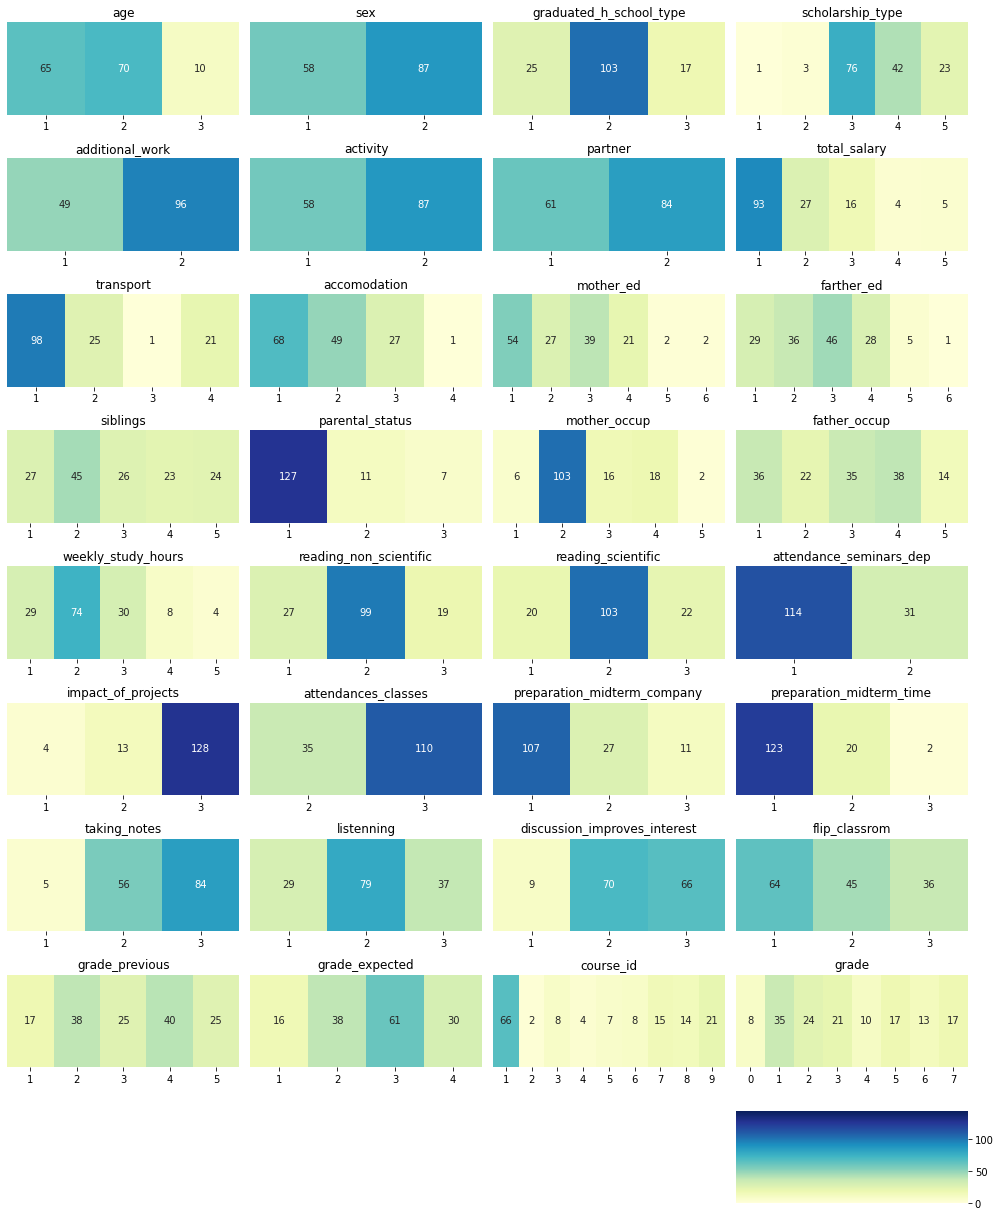

In [17]:
fig1, axes1 = plt.subplots(figsize = (14,17), ncols=4, nrows = 9) #Crear figura
axes1 = axes1.flatten() #Aplanar el array
#Eliminar ejes que sobran
fig1.delaxes(axes1[-2])
fig1.delaxes(axes1[-3])
fig1.delaxes(axes1[-4])
for columna, axis in zip(df.columns, axes1): #Loop sobre columnas y ejes
    #Obtener tabla con distribuciones marginales de spark y transformar a dataframe de pandas
    tabla = df.groupBy(columna).count().toPandas().sort_values(by = columna) 
    marginal = tabla['count'] #Calcular distribuciones marginales
    ticks = tabla[columna].unique() #Obtener las etiquetas de las categorías
    #Dibujar mapa de calor
    sns.heatmap([marginal], vmax = 145, vmin = 0, annot = [marginal], cmap = 'YlGnBu', fmt = 'd',\
                cbar_ax = axes1[-1], ax = axis, xticklabels = ticks, yticklabels = False)
    axis.set(title = columna)
plt.tight_layout()

Observamos que dentro de las características hay ciertas categorías con muy pocas observaciones.
Para los modelos de aprendizaje de maquina puede ser díficil determinar el efecto de estas categorías, asi como también podria darse el caso de que al hacer validación cruzada todas las observaciones queden en el set de entrenamiento, o en el de prueba contribuyendo al sobreajuste.

Las categorías con menos de 10 observaciones (valor elegido arbitrariamente) serán unidas a otras categorías, cuando sea posible, de la siguiente manera:
- Para variables ordinales se uniran a la categoría más cercana.
- Para variables nominales se uniran en una variable 'otros', si es que no existe todavía.

Las excepciones a esto son las características 'accomodation' (la categoría con una observación ya corresponde a la categoría otros), 'preparation_midterm_time' (la categoría con 2 observaciones no tiene con quien unirse).

In [18]:
#Diccionario para combinar las categorías
reemplazos2 = {
                'scholarship_type':  {1: 3, 2: 3},
                'total_salary': {4: 3, 5: 3},
                'transport': {3: 4},
                'mother_ed': {5: 4, 6: 4},
                'farther_ed': {5: 4, 6: 4},
                'parental_status': {2: 4, 3: 4},
                'mother_occup': {1: 6, 5: 6},
                'weekly_study_hours': {5: 4},
                'impact_of_projects': {1: 2},
                'taking_notes': {1: 2},  
                'discussion_improves_interest': {1: 2},
                'course_id': {2: 10, 3: 10, 4: 10, 5: 10, 6: 10},
}

In [19]:
#Usamos select para ejecutar la transformación
df = df.select(*replace(df, reemplazos2))

Con estos cambios las características cambiadas quedan con las siguientes definiciones:

    scholarship_type - Scholarship type: (3: 50% or less, 4: 75%, 5: Full)
    total_salary - Total salary if available (1: USD 135-200, 2: USD 201-270, 3: Above USD 271)
    transport - Transportation to the university: (1: Bus, 2: Private car/taxi, 4: Other)
    accomodation - Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
    mother_ed - Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university or above)
    farther_ed - Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university or above)
    parental_status - Parental status: (1: married, 4: other)
    mother_occup - Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
    weekly_study_hours - Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: more than 11 hours)
    impact_of_projects - Impact of your projects/activities on your success: (1: negative, 2: neutral, 3: positive)
    attendances_classes -  Attendance to classes (1: never, 2: sometimes, 3: always)
    taking_notes - Taking notes in classes: (2: not always, 3: always)
    discussion_improves_interest - Discussion improves my interest and success in the course: (2: not always, 3: always)
    course_id - Course id: (1: course 1, 7: course 7, 8: course 8, 9: course 9, 10: other) 

Construimos el gráfico de arriba nuevamente para ver los cambios

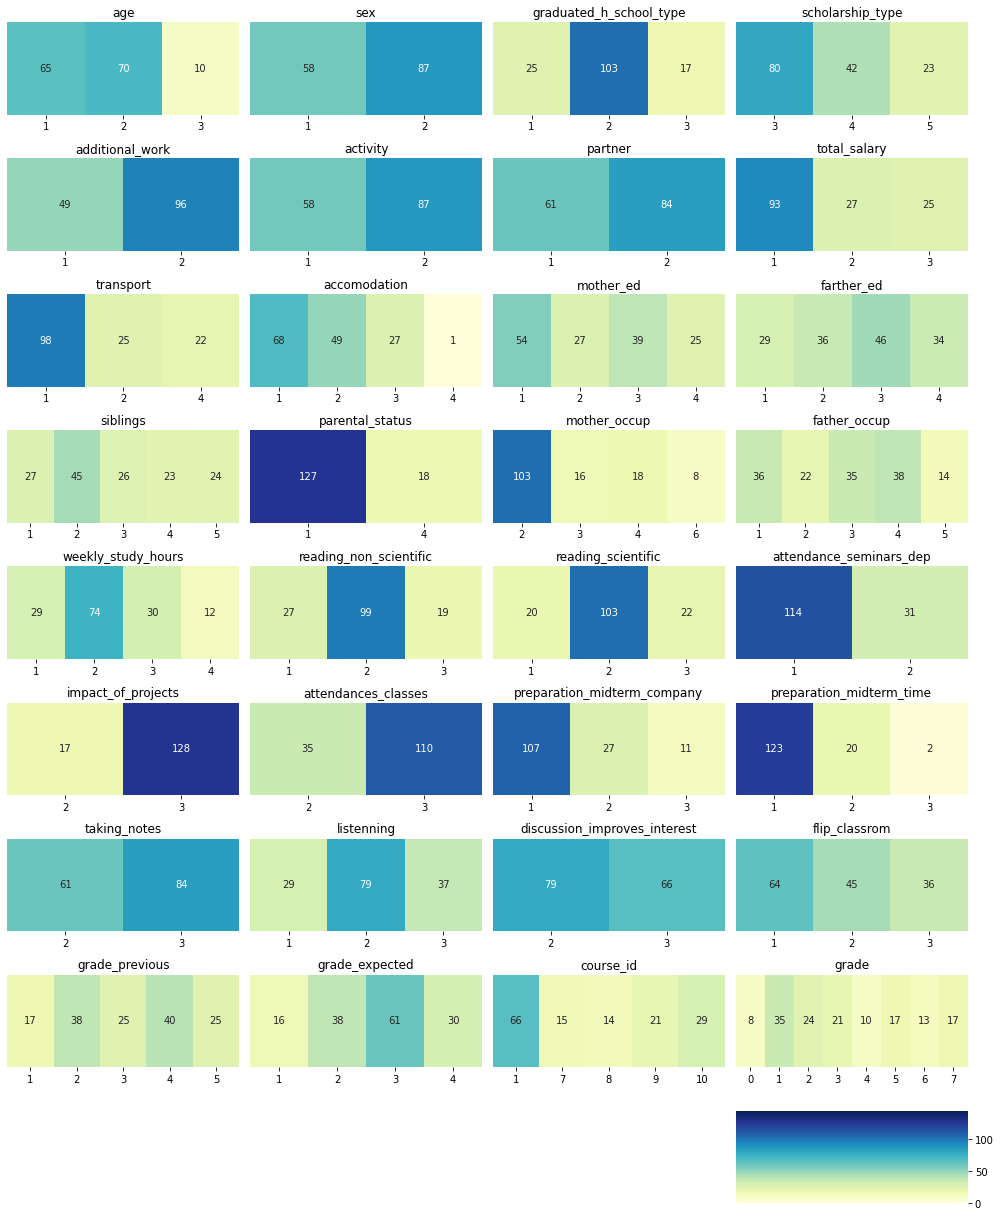

In [20]:
fig2, axes2 = plt.subplots(figsize = (14,17), ncols=4, nrows = 9) #Crear figura
axes2 = axes2.flatten() #Aplanar el array
#Eliminar ejes que sobran
fig2.delaxes(axes2[-2])
fig2.delaxes(axes2[-3])
fig2.delaxes(axes2[-4])
for columna, axis in zip(df.columns, axes2): #Loop sobre columnas y ejes
    tabla = df.groupBy(columna).count().toPandas().sort_values(by = columna) 
    marginal = tabla['count'] #Calcular distribuciones marginales
    ticks = tabla[columna].unique() #Obtener las etiquetas de las categorías
    #Dibujar mapa de calor
    sns.heatmap([marginal], vmax = 145, vmin = 0, annot = [marginal], cmap = 'YlGnBu', fmt = 'd',\
                cbar_ax = axes2[-1], ax = axis, xticklabels = ticks, yticklabels = False)
    axis.set(title = columna)
plt.tight_layout()

In [21]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- graduated_h_school_type: integer (nullable = true)
 |-- scholarship_type: integer (nullable = true)
 |-- additional_work: integer (nullable = true)
 |-- activity: integer (nullable = true)
 |-- partner: integer (nullable = true)
 |-- total_salary: integer (nullable = true)
 |-- transport: integer (nullable = true)
 |-- accomodation: integer (nullable = true)
 |-- mother_ed: integer (nullable = true)
 |-- farther_ed: integer (nullable = true)
 |-- siblings: integer (nullable = true)
 |-- parental_status: integer (nullable = true)
 |-- mother_occup: integer (nullable = true)
 |-- father_occup: integer (nullable = true)
 |-- weekly_study_hours: integer (nullable = true)
 |-- reading_non_scientific: integer (nullable = true)
 |-- reading_scientific: integer (nullable = true)
 |-- attendance_seminars_dep: integer (nullable = true)
 |-- impact_of_projects: integer (nullable = true)
 |-- attendances_classes: int

Calculamos también la matriz de correlaciones de spearman entre las variables ordinales y categoricas binarias.
Este cálculo es caro computacionalmente porque primero requiere la computación de un dataframe intermedio, y segundo porque la correlación de spearman requiere recorrer más de una vez el conjunto de datos.

Realizamos este calculo usando el modulo MLib de spark.
Primero necesitamos transformar las variables de interes a un único vector.

In [22]:
#Crea el objeto de transformación
assembler = VectorAssembler(inputCols = binarias + ordinales, outputCol = 'features')
#Aplica el objeto de transformación y guarda en cache para mejorar el performance
df_correlacion = assembler.transform(df).cache()

Ahora ejecutamos la transformación y calculamos la matriz de correlación.

In [23]:
correlation_matrix = Correlation.corr(df_correlacion, 'features', 'spearman').collect()[0][0]

Por último transformamos la matriz de correlación a un dataframe de pandas

In [24]:
correlation_matrix = pd.DataFrame(correlation_matrix.toArray().astype('float64'))
correlation_matrix.columns = pd.Index(binarias + ordinales)
correlation_matrix.index = pd.Index(binarias + ordinales)

In [25]:
correlation_matrix

,sex,additional_work,activity,partner,attendance_seminars_dep,age,scholarship_type,total_salary,mother_ed,farther_ed,...,reading_non_scientific,reading_scientific,impact_of_projects,attendances_classes,taking_notes,listenning,discussion_improves_interest,grade_previous,grade_expected,grade
sex,1.000000,0.190476,0.224138,-0.125471,-0.363971,0.121486,-0.183628,0.032398,0.078131,0.146151,...,0.048785,-0.006961,0.140028,0.065795,0.045626,-0.186422,0.039576,0.239403,0.308346,0.331418
additional_work,0.190476,1.000000,0.220238,0.100010,-0.018640,-0.160939,0.032637,-0.062200,0.162569,0.226785,...,-0.094685,-0.172383,0.102208,-0.028198,-0.077197,-0.163732,0.038163,0.033430,0.010480,0.162538
activity,0.224138,0.220238,1.000000,-0.011406,-0.020602,0.142205,-0.160744,0.134334,-0.129925,-0.110963,...,-0.278769,-0.214957,0.052511,-0.098693,-0.011406,0.002237,-0.045230,0.003625,-0.100829,-0.048392
partner,-0.125471,0.100010,-0.011406,1.000000,0.103634,0.044859,0.118939,-0.065085,-0.050528,0.047192,...,0.091535,-0.003977,-0.050013,-0.154225,-0.018735,-0.056239,0.049528,-0.059779,-0.006694,-0.040751
attendance_seminars_dep,-0.363971,-0.018640,-0.020602,0.103634,1.000000,-0.236318,0.226369,-0.161463,-0.024966,-0.172766,...,-0.068581,0.143931,-0.175977,-0.059643,0.205857,0.007128,0.030052,-0.189543,-0.051333,-0.191392
age,0.121486,-0.160939,0.142205,0.044859,-0.236318,1.000000,-0.372424,0.107085,-0.068060,-0.040642,...,0.063012,0.060175,0.002868,-0.059299,-0.167286,0.219238,-0.043544,0.150770,0.082118,-0.070318
scholarship_type,-0.183628,0.032637,-0.160744,0.118939,0.226369,-0.372424,1.000000,-0.153236,-0.068452,-0.205426,...,0.041947,0.041977,-0.055983,0.132275,0.132527,0.030674,0.165699,0.215149,0.224058,0.079437
total_salary,0.032398,-0.062200,0.134334,-0.065085,-0.161463,0.107085,-0.153236,1.000000,0.071258,0.036540,...,-0.185593,-0.052063,-0.013237,-0.198118,-0.226623,-0.051162,-0.115827,-0.143238,-0.081336,-0.173712
mother_ed,0.078131,0.162569,-0.129925,-0.050528,-0.024966,-0.068060,-0.068452,0.071258,1.000000,0.437454,...,-0.000271,0.011502,0.004545,0.061909,0.015158,-0.035584,-0.023663,-0.036876,-0.019345,0.048843
farther_ed,0.146151,0.226785,-0.110963,0.047192,-0.172766,-0.040642,-0.205426,0.036540,0.437454,1.000000,...,-0.013760,-0.120005,0.031036,-0.081765,0.016941,-0.087881,-0.129725,-0.079947,-0.176182,0.043744


Ahora la graficamos para una visualización más fácil.

<Axes: >

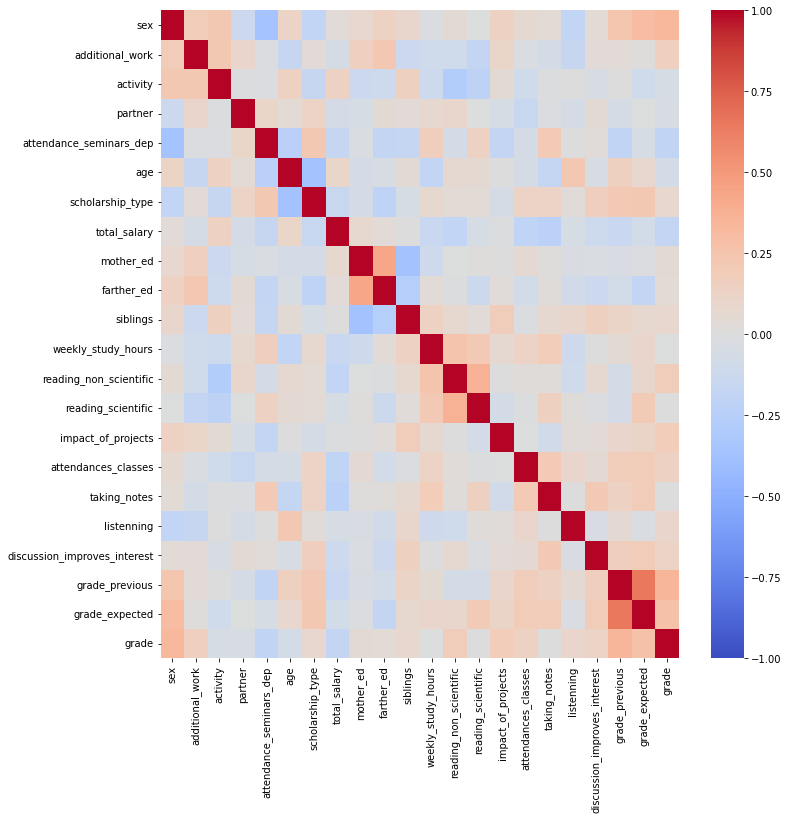

In [26]:
#Crear figura
fig3 = plt.figure(figsize = (9,9))
axis3 = fig3.add_axes([0,0,1,1])
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', ax = axis3)

Observamos correlaciones positivas moderadamente débiles entre la variable objetivo 'grade' y las características 'grade_previous', 'sex' y 'grade_expected', y correlaciones muy debiles con las demás características (valor absoluto de la correlación menor a 0.2)

Por último hacemos un pequeño análisis bivariado, entre todas las características y la variable objetivo.

Para construir tablas de contingencia usamos la función crosstab de spark para construir la tabla inicial, convertimos la tabla a pandas y la procesamos para ordenarla e incluir los nombres de las variables.
Definimos una función que haga este proceso.

In [27]:
def procesamiento_tabla(tabla, columna):
    #Reparar y ordenar indice
    tabla = tabla.set_index('grade_' + columna).sort_index()
    #Cambiar nombre a indice
    tabla.index.name = 'grade'
    #Cambiar tipo y nombre a columnas
    tabla.columns = pd.Index([int(a) for a in tabla.columns], name = columna)
    #Ordenar columnas
    tabla = tabla.sort_index(axis = 1)
    return tabla

Ahora se grafican las distribuciones conjuntas de cada caraterística con la variable objetivo. El número de cada celda indica el número de observaciones con esos valores de característica y variable objetivo.
Las celdas estan coloreadas según las observaciones en las columnas (o valor de la característica), el color se vuelve más intenso mientras mayor es la fracción de observaciones de esa columna que tienen un valor particular de 'grade'. Por ejemplo, accomodation en la columna 4 tiene una celda con un color muy intenso: esta celda concentra el 100% de las observaciones (una observación) para ese valor de accomodation.
La coloración no toma en cuenta el balance de la característica.

Características donde las categorías estan más o menos balanceadas, y tienen columnas con tonos muy distintos serían buenos predictores de la variable objetivo.

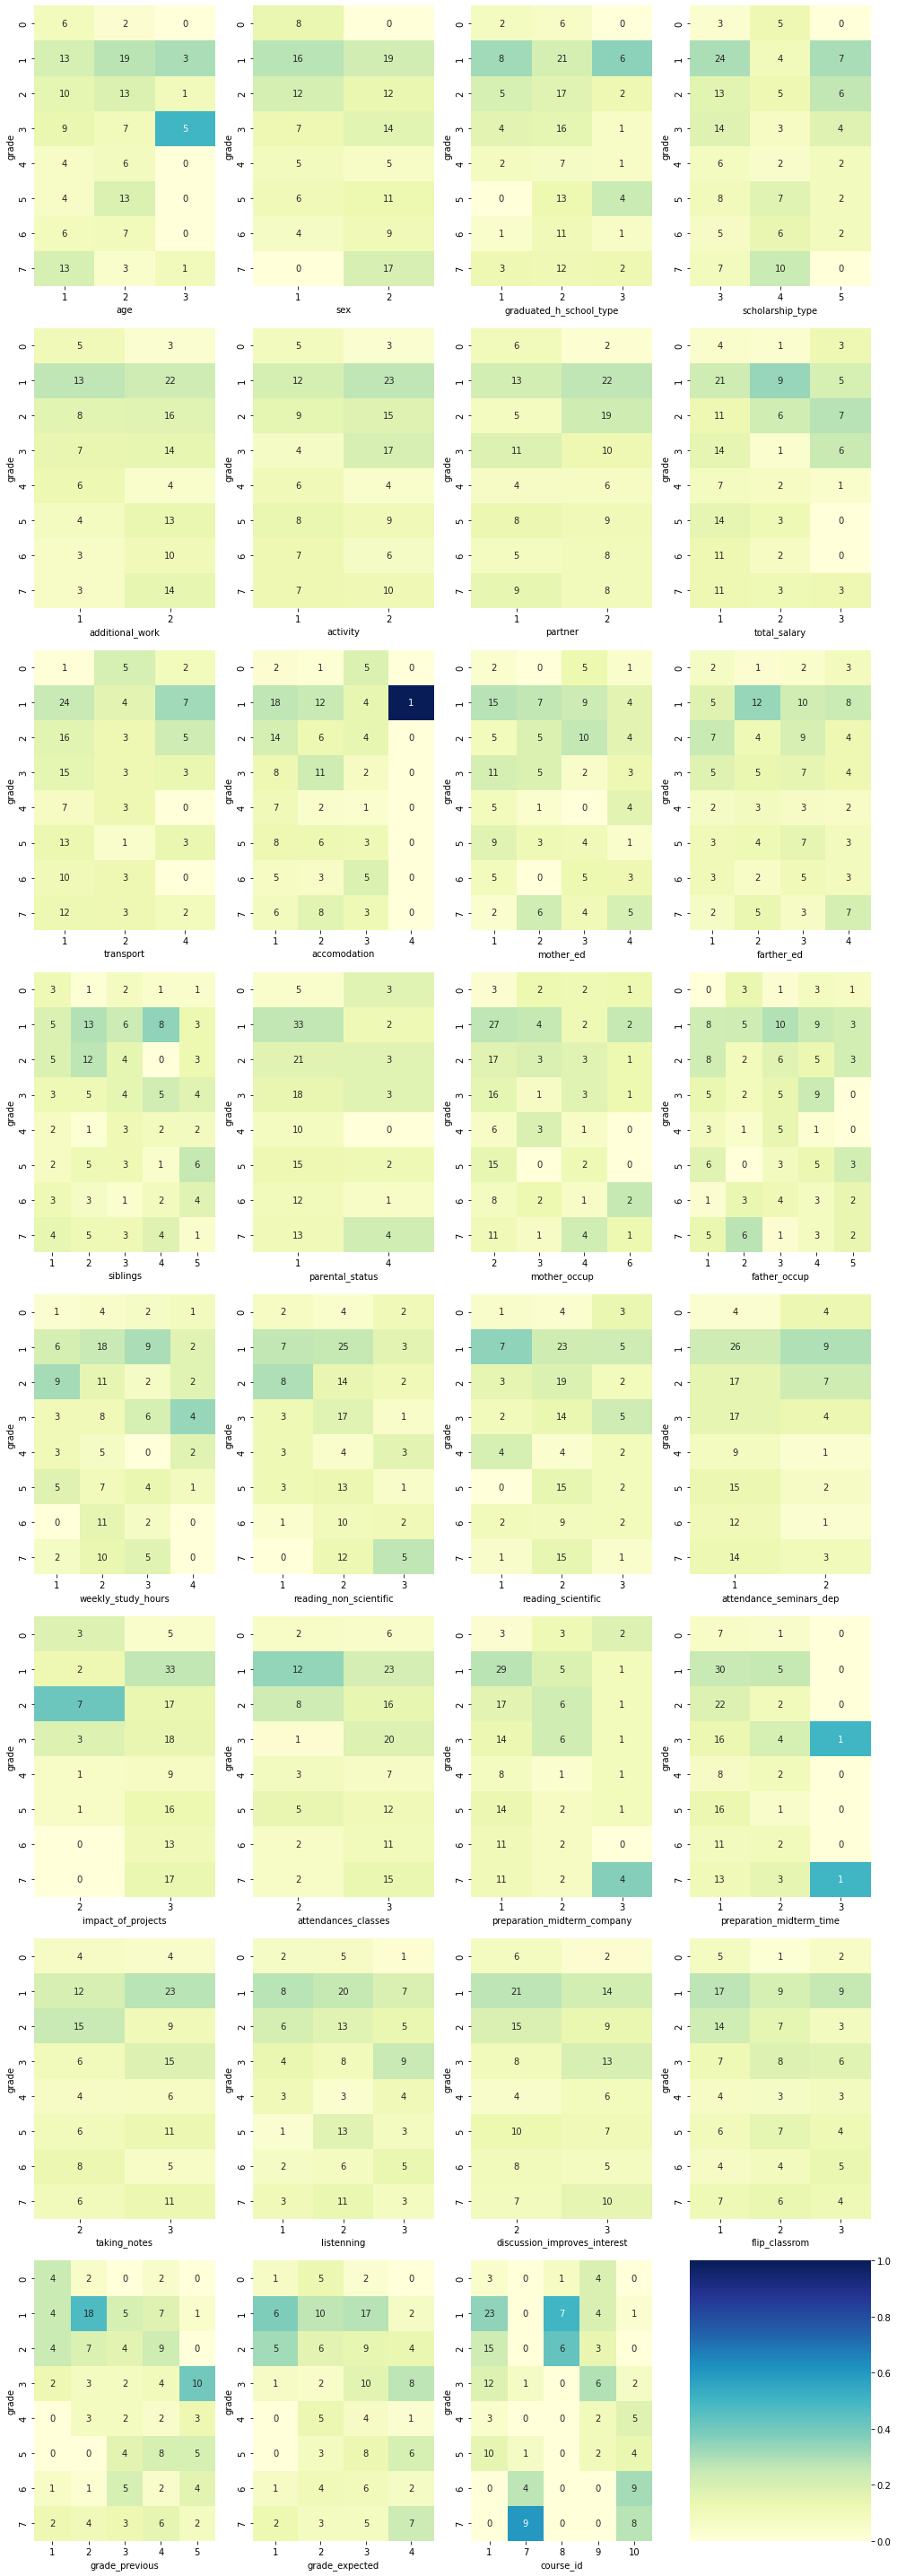

In [28]:
fig4, axes4 = plt.subplots(figsize = (14,40), ncols=4, nrows = 8) #Crear figura
axes4 = axes4.flatten() #Aplanar el array
for columna, axis in zip(df.columns, axes4): #Loop sobre columnas y ejes   
    if columna == 'grade':
        continue
    #Calcular tabla de frecuencias con spark y transformar a dataframe de pandas
    tabla1 = df.crosstab('grade',columna).toPandas()
    #Procesar la tabla de frecuencias
    tabla1 = procesamiento_tabla(tabla1, columna)
    #Calcular tabla de frecuencias relativas
    tabla2 = tabla1.div(tabla1.sum(axis=0), axis=1)
    sns.heatmap(tabla2, vmax = 1, vmin = 0, annot = tabla1, cmap = 'YlGnBu', fmt = 'd', cbar_ax = axes4[-1], ax = axis) 
plt.tight_layout()

Notamos que basado en este análisis solo 'grade_previous', 'course_id' y quizás 'grade_expected' parecen ser buenos predictores.
Las demás características con grandes diferencias en tonos, como 'preparation_midterm_time', 'impact_of_projects' o 'accomodation' también son características bastantes desbalanceadas.

# 4 Construcción de un modelo de aprendizaje de maquina

## 4.1 Definición del modelo 

A pesar de las observaciones anteriores, incluimos todas las características en el modelo ya que un simple análisis bivariado no toma en cuenta todas las relaciones entre las características, y características que parecen no tener poder de predicción podrían resultar ser importantes. 

Como estamos realizando una tarea de clasificación, y tomando en cuenta que a pesar de existir desbalance en las clases, este no es tan grande, y que se esperaría que los costos de equivocarse en las predicciones deberían ser simétricos, elegimos medir el desempeño los modelos obtenidos usando accuracy, que nos da el porcentaje de las veces que predicimos exactamente la clase correcta.

## 4.2 Preprocesamiento de variables

Los modelos de aprendizaje de maquina requieren que a las variables categoricas se les aplique 'one-hot encoding', y varios algoritmos son sensibles a la escala de los datos por lo que aplicamos a todos los datos la misma escala.
Además para poder entrenar los modelos con MLib de spark necesitamos vectorizar todas las variables.

In [29]:
#Lista con las columnas despues de aplicar one hot encoding
nominales_ohe = [category + "_ohe" for category in nominales]
#Lista con todas las columnas de interes
all = nominales_ohe + binarias + ordinales
#removemos la variable objetivo de la lista
all.remove('grade')

In [30]:
#Preparar el one hot encoder
ohe = OneHotEncoder(inputCols = nominales, outputCols = nominales_ohe)
# Vectorizar todas las columnas
assembler = VectorAssembler(inputCols = all, outputCol = 'features')
#Escalar las variables
scaler = StandardScaler(inputCol = 'features', outputCol = 'scaled')

Finalmente creamos un pipeline con todos estos pasos

In [31]:
pre_pipe = Pipeline(stages=[ohe,assembler,scaler])

## 4.3 Validación cruzada 

Primero dividimos los datos en un conjunto de entrenamiento y de pruebas. Aprovechando el hecho de que 145 es multiplo de 5 dejamos 80% de los datos para entrenamiento y 20% para pruebas. Usamos un muestreo aleatorio simple por lo que no podemos asegurar que la distribución de la variable objetivo sea la misma tanto en las pruebas como en el entrenamiento.

Luego entrenamos el preprocesador en el conjunto de pruebas y lo aplicamos a ambos conjuntos

In [32]:
#Datos de entrenamiento y prueba
train_data, test_data = df.randomSplit([0.8, 0.2], seed = rng_seed) 
#Entrenar pipeline de preprocesamiento
pre_pipe_fitted = pre_pipe.fit(train_data)

In [33]:
#Aplicamos preprocesamiento a los datos de entrenamiento y filtramos las columnas de interés
train_data = pre_pipe_fitted.transform(train_data).select('features','grade')
test_data = pre_pipe_fitted.transform(test_data).select('features','grade')

## 4.4 Entrenamiento del modelo y optimización de hiperparametros

Spark no tiene un gran repertorio de clasificadores multiclase, y aunque este número es un poco más extenso cuando se usa la estrategia 'one vs rest', esto implica ajustar varios clasificadores lo que viene con una gran penalización en recursos computacionales.
Consideramos como modelos un único arbol de decisión, random forest, regresión logística y naive bayes. Estos 4 modelos representan el 80% del repertorio de MLib para clasificación multiclase, y el modelo restante, perceptrón multicapas, requiere un mayor uso de recursos computacionales y presenta una mayor dificultad para la optimización de hiperparametros.


Primero instanciamos objetos de cada modelo de clasificación.

In [34]:
lr = LogisticRegression(featuresCol='features', labelCol='grade')
nb = NaiveBayes(featuresCol = 'features', labelCol = 'grade')
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'grade')
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'grade', )

Instanciamos también el objeto para evaluar los resultados

In [35]:
evaluator = MulticlassClassificationEvaluator(labelCol='grade', predictionCol='prediction', metricName='accuracy')

Ahora preparamos el optimizador que ajustara el modelo a la vez que intenta optimizar los hiperparametros. Como pySpark solo implemente busqueda de grilla y busqueda aleatoria para optimizar, utilizaremos nuevamente el modulo hyperopt version 0.2.7

Para ambos clasificadores basados en arbol optimizamos:

max_depth, min_instances: controlan la complejidad del árbol.

Además para random forest optimizamos:

feature_subset: controla cuantas características pueden ser consideradas al dividir los nodos del árbol.

No optimizamos el número de arboles, si no que elegimos un valor suficientemente grande que se espera sea suficiente para estabilizar la varianza.

Para el clasificador basado en regresión logística optimizamos:

reg_param: controla el monto de regularización

elastic_net: controla el balance entre regularización L1 y L2

Naive bayes no tiene hiperparametros para optimizar

Ahora creamos la función encargada de entrenar los modelos

In [36]:
def hyper_optimize(params, train_set = train_data, test_set = test_data, return_model = False):
    '''Función que ajusta los modelos usando los pipelines, luego los evalúa 
    y devuelve el accuracy obtenido'''
    type = params['type']
    del params['type']
    
    if type == 'decision_tree':
        #Extraer parametros
        max_depth = params['max_depth']
        min_instances = params['min_instances']
        seed = params['seed']
        #spark requiere los objetos en vez de los strings asi que hay que crear otro diccionario
        dict = {dt.maxDepth: max_depth, dt.minInstancesPerNode: min_instances, dt.seed: seed}
        model = dt.fit(train_set, dict)
    
    elif type == 'random_forest':
        #Extraer parametros
        max_depth = params['max_depth']
        min_instances = params['min_instances']
        seed = params['seed']
        num_trees = params['num_trees']
        feature_subset = str(int(params['feature_subset'])) #debe ser string
        #spark requiere los objetos en vez de los strings asi que hay que crear otro diccionario
        dict = {rf.maxDepth: max_depth, rf.minInstancesPerNode: min_instances,
                rf.seed: seed, rf.numTrees: num_trees, rf.featureSubsetStrategy: feature_subset}
        model = rf.fit(train_set, dict)
    
    elif type == 'logistic_regression':
        #Extraer parametros
        reg_param = params['reg_param']
        elastic_net = params['elastic_net']
        #spark requiere los objetos en vez de los strings asi que hay que crear otro diccionario
        dict = {lr.regParam: reg_param, lr.elasticNetParam: elastic_net}
        model = lr.fit(train_set, dict)
    
    elif type == 'naive_bayes':
        model = nb.fit(train_set)
    #Podemos ahorrar esfuerzo haciendo que la función entregue el modelo final.    
    if return_model == False:
        predictions = model.transform(test_set)
        score = evaluator.evaluate(predictions)
        return -score
    else:
        return model

Luego definimos el espacio de busqueda.

In [37]:
#El optimizador intentara cada modelo definido abajo con los hiperparametros que le corresponden.
space = hp.choice('classifier_type', [
        #Hiperparametros para árbol de decisión
    {   'type': 'decision_tree',
        'seed': rng_seed,
        'max_depth': hp.quniform('dt.maxDepth', 1, 30, 1),
        'min_instances': hp.quniform('dt.minInstancesPerNode', 1, 15, 1),
    },
        #Hiperparametros para random_forest
    {   'type': 'random_forest',
        'seed': rng_seed,
        'num_trees': 50,
        'max_depth': hp.quniform('rf.max_depth', 1, 30, 1),
        'min_instances': hp.quniform('rf.minInstancesPerNode', 1, 10, 1),
        'feature_subset': hp.quniform('rf.featureSubsetStrategy', 1, 50, 1)
    },
        #Hiperparametros para regresión logística
        {'type': 'logistic_regression',
         'reg_param': hp.loguniform('lr.regParam',0,100),
         'elastic_net': hp.uniform('lr.elasticNetParam',0, 1),
    },
        #Hiperparametros para naive bayes
        {'type': 'naive_bayes'}
])

In [38]:
#Corre la optimización. Toma cerca de 2 minutos en mi maquina
optimo=fmin(fn=hyper_optimize, # Función a optimizar
          space=space, #Espacio de busqueda
          algo=tpe.suggest, # Algoritmo de optimización bayesiano
          max_evals=100, # Numero de iteraciones
          rstate=np.random.default_rng(rng_seed)
         )

100%|██████| 100/100 [01:52<00:00,  1.12s/trial, best loss: -0.4583333333333333]


Ahora revisamos cuales son los hiperparametros óptimos

In [39]:
optimal_params = space_eval(space, optimo)
print(optimal_params)

{'max_depth': 29.0, 'min_instances': 9.0, 'seed': 42, 'type': 'decision_tree'}


El modelo elegido fue un único árbol de decisión con una alta profundidad máxima con 9 muestras mínimas por nodo.
Ajustamos nuevamente el modelo y lo guardamos.

In [40]:
dt_fit = hyper_optimize(optimal_params, train_data, test_data, True) 
dt_fit

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_21cff6bece61, depth=6, numNodes=19, numClasses=8, numFeatures=76

Observamos que el verdadero árbol no esta cerca de la profundidad máxima. Hay que recordar que la profundiad esta controlada tanto por el parametro 'max_depth' como por el parametro 'min_instances' por lo que estos resultados no tienen nada de extraño.

## 4.5 Evaluación

Evaluamos las predicciones del modelo final en el conjunto de pruebas

In [41]:
# Generar predicciones
predicciones = dt_fit.transform(test_data)

In [42]:
#Calcular accuracy
evaluator.evaluate(predicciones)

0.4583333333333333

En este punto sería conveniente poder calcular la matriz de confusión, pero todavía no estan implementadas en MLib lo que significaría que tendríamos que escribir nuestras propias funciones. Nos ahorramos este esfuerzo y continuamos a la siguiente sección.

## 4.6 Pipeline final

Por último creamos el pipeline final que aplique todas las transformaciones necesarias para poder realizar predicciones con datos nuevos

In [43]:
dt_pipe = PipelineModel(stages = [pre_pipe_fitted,dt_fit])

Podemos comprobar que funciona intentando aplicarlo a todos los datos, como es una transformación no se ejectuta esto no tiene costo computacional.

In [44]:
dt_pipe.transform(df)

DataFrame[age: int, sex: int, graduated_h_school_type: int, scholarship_type: int, additional_work: int, activity: int, partner: int, total_salary: int, transport: int, accomodation: int, mother_ed: int, farther_ed: int, siblings: int, parental_status: int, mother_occup: int, father_occup: int, weekly_study_hours: int, reading_non_scientific: int, reading_scientific: int, attendance_seminars_dep: int, impact_of_projects: int, attendances_classes: int, preparation_midterm_company: int, preparation_midterm_time: int, taking_notes: int, listenning: int, discussion_improves_interest: int, flip_classrom: int, grade_previous: int, grade_expected: int, course_id: int, grade: int, sex_ohe: vector, graduated_h_school_type_ohe: vector, additional_work_ohe: vector, activity_ohe: vector, partner_ohe: vector, transport_ohe: vector, accomodation_ohe: vector, parental_status_ohe: vector, mother_occup_ohe: vector, father_occup_ohe: vector, attendance_seminars_dep_ohe: vector, preparation_midterm_compa

Ahora cerramos la sesión y liberamos los recursos

In [45]:
spark.stop()

# 5. Conclusiones

Nuevamente hemos ajustado y optimizado los hiperparametros de un modelo de aprendizaje de maquina a los datos del proyecto HESPE.
La diferencia es que esta vez hemos usado herramientas capaces de escalar a grandes cantidades de datos. Para esto hemos reescrito en pySpark la lógica de obtención de datos de la sección de análisis exploratorio, y de preprocesamiento y entrenamiento para la sección de aprendizaje de maquina, y hemos usado pandas solo para post-procesar los resultados para poder gráficarlos con la biblioteca seaborn.

Ciertas tareas que eran fáciles de realizar con pandas y sklearn como por ejemplo reemplazar valores de columnas, realizar separación entrenamiento-prueba con estratificación y calcular matrices de confusión no son tan fáciles de realizar con pySpark, requiriendo, al menos por ahora, que programemos estas funciones nosotros mismos, lo que también requiere que tengamos en cuenta el costo computacional de lo que estamos realizando y mantengamos al mínimo los dataframes intermedios creados y la ejecución de acciones. En esta oportunidad solo hemos programado funciones para realizar la primera tarea de reemplazar valores en columnas.

En esta oportunidad el modelo optimo fue nuevamente un árbol de decisión, con un accuracy de 45.8%, ligeramente mayor al de 41% obtenido anteriormente. Esta mejora probablemente se deba a suerte en la división entrenamiento-prueba que fue realizada sin estratificación, pero para estar seguros de esto tendríamos que evaluar más profundamente el modelo final, tanto en el tipo de errores que comete como en su estabilidad frente a cambios en los datos, y esto requiere la creación de más funciones que realicen las tareas necesarias.

A pesar del párrafo anterior, las conclusiones obtenidas en trabajos previos aún aplican: la necesidad de medir caracteŕisticas con mayor poder de predicción, o evaluar la posibilidad de reducir nuestras expectativas e intentar resolver un problema más simple, el que podría ser por ejemplo predecir si la nota es menor o mayor a 'CC', predecir la nota pero permitiendo un error de 1 categoría en cualquier dirección, o predecir si un estudiante pasa o falla el curso. 